In [1]:
from robust_motifs.data import import_connectivity_matrix, save_count_graph_from_matrix, MPDataManager
from pathlib import Path

In [2]:
from robust_motifs.counting import get_n_extended_simplices_dense, count_bisimplices_dense

In [3]:
import multiprocessing as mp

In [4]:
import time

In [5]:
from tqdm import tqdm

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import gc

In [9]:
pool = mp.Pool()

  0%|          | 0/6 [00:00<?, ?it/s]

3001770


 33%|███▎      | 2/6 [41:34<55:01, 825.47s/it]

3443834
484346


 50%|█████     | 3/6 [1:17:47<1:01:29, 1229.68s/it]

11474


 83%|████████▎ | 5/6 [1:22:33<11:03, 663.31s/it]   

36


100%|██████████| 6/6 [1:22:35<00:00, 825.84s/it]

0


NameError: name 'layer' is not defined

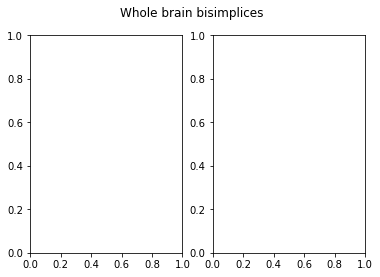

In [10]:
matrix = import_connectivity_matrix(dataframe = False, type = 'csr')
save_path = Path("data/counting/full/full.flag")
manager = MPDataManager(save_path, matrix)
results = []
simplices = []
for dimension in tqdm(range(1,7)):
    try:
        iterator = manager.mp_np_simplex_iterator_dense(dimension = dimension, random = False)
        r = pool.imap(count_bisimplices_dense, iterator, chunksize=1000)
        count = 0
        for element in r:
            count += element
        print(count)
        results.append(count)
    except Exception as e:
        results.append(0)
        print(e)
    try:
        simplices.append(len(manager._count_file['Cells_' + str(dimension)]))
    except:
        simplices.append(0)
    manager._shut_shared_memory()
    del iterator
fig, axes = plt.subplots(1,2)
fig.suptitle("Whole column bisimplices")
dims = np.arange(1,7)
width = 0.35
axes[0].bar(dims+width/2,results,width,label = 'Bimplices')
axes[0].bar(dims-width/2,simplices,width,label = 'Simplices')
axes[0].set_xticks(dims)
axes[0].set_ylabel("Motifs")
axes[0].legend()
ratios = np.array(results)/np.array(simplices)
ratios[np.isnan(ratios)]=0
axes[1].bar(range(1,7),ratios)
axes[1].set_ylabel("BS/S ratio")
axes[1].set_xlabel("Dimension")
fig.savefig("bs-whole")

100%|██████████| 6/6 [25:41<00:00, 256.88s/it]


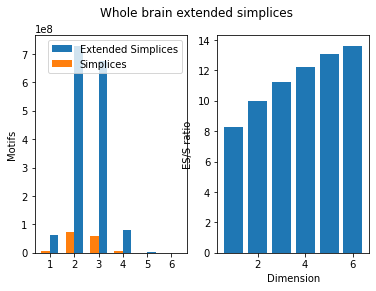

In [13]:
matrix = import_connectivity_matrix(dataframe = False, type = 'csr')
save_path = Path("data/counting/full/full.flag")
manager = MPDataManager(save_path, matrix)
results = []
simplices = []
for dimension in tqdm(range(1,7)):
    try:
        iterator = manager.mp_np_simplex_iterator_dense(dimension = dimension, random = False)
        r = pool.imap(get_n_extended_simplices_dense, iterator, chunksize=1000)
        count = 0
        for element in r:
            count += element
        results.append(count)
    except Exception as e:
        results.append(0)
        print(e)
    try:
        simplices.append(len(manager._count_file['Cells_' + str(dimension)]))
    except:
        simplices.append(0)
    manager._shut_shared_memory()
    del iterator
fig, axes = plt.subplots(1,2)
fig.suptitle("Whole column extended simplices")
dims = np.arange(1,7)
width = 0.35
axes[0].bar(dims+width/2,results,width,label = 'Extended Simplices')
axes[0].bar(dims-width/2,simplices,width,label = 'Simplices')
axes[0].set_xticks(dims)
axes[0].set_ylabel("Motifs")
axes[0].legend()
ratios = np.array(results)/np.array(simplices)
ratios[np.isnan(ratios)]=0
axes[1].bar(range(1,7),ratios)
axes[1].set_ylabel("ES/S ratio")
axes[1].set_xlabel("Dimension")
fig.savefig("es-whole")